In [15]:
%matplotlib notebook

import tensorflow as tf

import tensorflow.keras as K
import tensorflow.keras.preprocessing as Kproc
import tensorflow.keras.applications as Kmodels

import numpy as np
import os
from matplotlib import pyplot as plt
from PIL import Image

tf.config.set_visible_devices([], 'GPU')
visible_devices = tf.config.get_visible_devices()
for device in visible_devices:
    assert device.device_type != 'GPU'


print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.2.0


Introduce the name of the file: true_input.jpeg


<IPython.core.display.Javascript object>


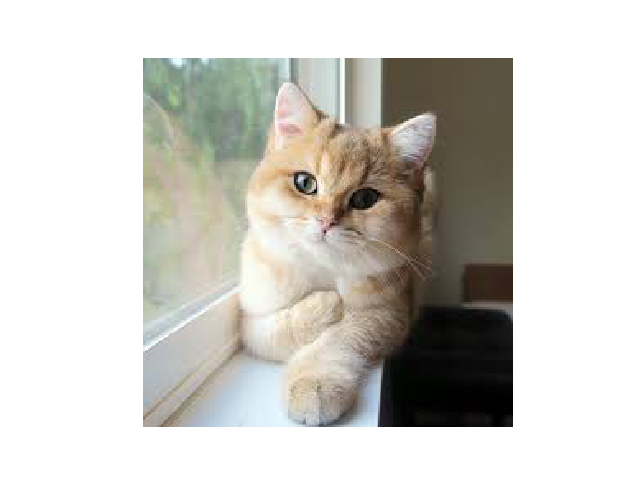

Meowwww!


In [20]:
feline_labels = [
    "tabby", 
    "tiger_cat", 
    "Persian_cat", 
    "Siamese_cat", 
    "Egyptian_cat", 
    "cougar", 
    "lynx", 
    "leopard", 
    "snow_leopard", 
    "jaguar",
    "tiger", 
    "cheetah"
]

model = tf.keras.applications.VGG19()
image_name = './src/{}'.format(input('Introduce the name of the file: '))
image = Kproc.image.load_img(image_name, target_size=(224,224))
image = Kproc.image.img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = Kmodels.vgg19.preprocess_input(image)
prediction = model.predict(image)
label = Kmodels.vgg19.decode_predictions(prediction, top=3)
detected_object = label[0][0][1]


if detected_object in feline_labels:
    img = Image.open(image_name)
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    print('Meowwww!')
